In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import scipy.optimize as optimize
import datetime

In [2]:
data = np.loadtxt(open("../data/sds_galaxy.txt", 'rb'), usecols=range(4))

# This is how we pull out the data from columns in the array.
wavelength = data[:,0]
flux = data[:,1]
best_fit = data[:,2]
sky_flux = data[:,3]

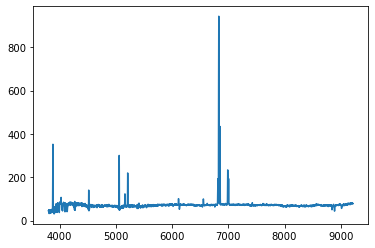

In [3]:
_ = plt.plot(wavelength, best_fit)

In [4]:
peak_idx = np.argmax(flux)

In [5]:
cutout_wl = wavelength[peak_idx-50:peak_idx+50]
cutout_flux = flux[peak_idx-50:peak_idx+50]

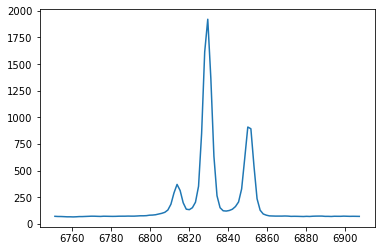

In [6]:
_ = plt.plot(cutout_wl, cutout_flux)

In [7]:
mask = (wavelength > 5000) & (wavelength < 5100)

In [8]:
cutout_wl = wavelength[mask]
cutout_flux = flux[mask]

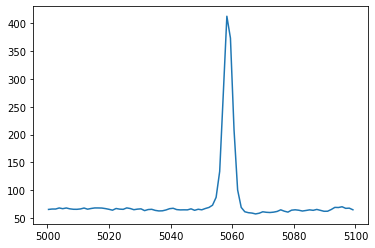

In [9]:
_ = plt.plot(cutout_wl, cutout_flux)

In [10]:
from functools import partial

def Gauss(x, prefact, mu, sigma):
    return prefact*stats.norm(loc=mu, scale=sigma).pdf(x)

def poly1(x, offset, slope):
    return offset + x*slope

def model_func(x, prefact, mu, sigma, offset, slope):
    return Gauss(x, prefact, mu, sigma) + poly1(x, offset, slope)

def generic_chi2(params, data_vals, model_func, x):
    model_vals = model_func(x, *params)
    return np.sum((data_vals - model_vals)**2)

def specific_chi2(data_vals, model_func, x):
    print(data_vals, model_func, x)
    return partial(generic_chi2, data_vals=data_vals, model_func=model_func, x=x)

    

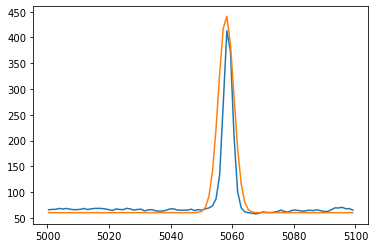

In [11]:
prefact_0 = 2400.
mu_0 = 5058
sigma_0 = 2.5
offset_0 = 60
slope_0 = 0

init_pars = (prefact_0, mu_0, sigma_0, offset_0, slope_0)

model_vals = model_func(cutout_wl, *init_pars)

_ = plt.plot(cutout_wl, cutout_flux)
_ = plt.plot(cutout_wl, model_vals)


In [12]:
our_chi2_func = specific_chi2(cutout_flux, model_func, cutout_wl)

[ 65.636  66.332  66.344  68.25   66.939  68.22   66.7    65.894  65.834
  66.494  68.142  66.042  67.343  68.283  68.263  68.098  67.13   65.856
  64.25   67.295  66.149  65.786  68.375  67.229  65.123  66.153  66.666
  63.487  65.396  65.84   63.892  62.906  63.139  64.673  66.959  67.705
  65.32   64.772  64.903  64.818  66.689  64.046  65.949  64.926  67.293
  69.171  73.194  87.29  133.913 272.73  412.721 373.442 208.449 100.673
  69.222  61.451  59.766  59.086  57.558  58.805  61.392  60.482  60.088
  60.724  62.032  64.917  62.425  60.817  64.279  64.957  64.201  62.75
  63.736  64.843  64.02   65.608  63.983  62.294  62.403  65.471  69.286
  69.053  70.428  67.575  67.921  64.99 ] <function model_func at 0x7fe4220343a0> [5000.344 5001.497 5002.648 5003.801 5004.952 5006.106 5007.258 5008.413
 5009.565 5010.717 5011.873 5013.026 5014.182 5015.335 5016.492 5017.646
 5018.8   5019.958 5021.112 5022.27  5023.426 5024.584 5025.74  5026.896
 5028.055 5029.212 5030.372 5031.529 5032.6

In [13]:
our_chi2_func(init_pars)

102756.23823938092

In [14]:
result = optimize.minimize(our_chi2_func, x0=np.array(init_pars))
fit_pars = result['x']
model_fit = model_func(cutout_wl, *fit_pars)

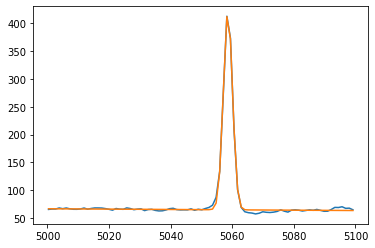

In [15]:
_ = plt.plot(cutout_wl, cutout_flux)
_ = plt.plot(cutout_wl, model_fit)
